In [4]:
from gibbs.dataclass import GibbsResult,get_results
import matplotlib.pyplot as plt
import numpy as np
from gibbs.learning.bayesian_learning import BayesianLearning
from gibbs.learning.constraint_matrix import ConstraintMatrixFactory
from qiskit.quantum_info import Statevector
from gibbs.learning.klocal_pauli_basis import KLocalPauliBasis
from scipy.linalg import block_diag
from scipy.sparse import bmat 
from qiskit.quantum_info import state_fidelity,Statevector
from gibbs.utils import number_of_elements, simple_purify_hamiltonian, spectral_dec,printarray, expected_state
from gibbs.plots.plots import preparation, compare_preparations, preparation_error
import plotly_express as px
# plt.rcParams['text.usetex'] = True

%load_ext autoreload
%autoreload 2

regular_result:GibbsResult = get_results("../scripts_lap/job_successquasm")[0]
zne_result:GibbsResult = get_results("../scripts_lap/job_7_qasmnoiserelisience")[0]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
print(regular_result.betas,zne_result.betas)

[0.0, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.36363636363636365, 0.4545454545454546, 0.5454545454545455, 0.6363636363636365, 0.7272727272727274, 0.8181818181818183] [0.0, 0.20000000000000004, 0.4000000000000001, 0.6000000000000001]


In [6]:
print(f"Temperatures are {regular_result.betas[rtime:=4]} for regular and {zne_result.betas[znetime:=2]} for zne")
state_regular = Statevector(regular_result.ansatz.bind_parameters(regular_result.parameters[rtime]))
state_regular_expected = simple_purify_hamiltonian(regular_result.basis.vector_to_pauli_op(regular_result.coriginal)*regular_result.betas[rtime])
state_zne = Statevector(zne_result.ansatz.bind_parameters(zne_result.parameters[znetime]))
state_zne_expected = simple_purify_hamiltonian(zne_result.basis.vector_to_pauli_op(zne_result.coriginal)*zne_result.betas[znetime])
print(f"We end up with fidelities of {state_fidelity(state_regular,state_regular_expected)} for the regular and {state_fidelity(state_zne,state_zne_expected)} for zne")
px.bar(y=np.real(zne_result.cfaulties[-1]))

Temperatures are 0.36363636363636365 for regular and 0.4000000000000001 for zne
We end up with fidelities of 0.8633801447554661 for the regular and 0.9395279572283657 for zne


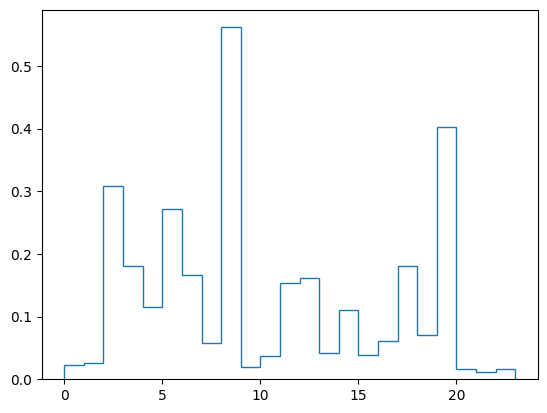

In [115]:
rtime=-1;znetime=-1
regular_error = np.abs(regular_result.cfaulties[rtime]-regular_result.coriginal*regular_result.betas[rtime]); regular_error = regular_error[regular_error>1e-2]
zne_error = np.abs(zne_result.cfaulties[znetime]-zne_result.coriginal*zne_result.betas[znetime]);zne_error = zne_error[zne_error >1e-2]
plt.stairs(zne_error)
import plotly.express as px
df = {"regular_error":regular_error,"zne_error":zne_error}
fig =px.histogram(x=zne_error,barmode="group",nbins=90,log_y=False,histnorm="probability")
fig.show()
# fig2 = px.bar(x=xx,y=lmd*np.exp(-xx*lmd))
# fig2.show()